In [1]:
!pip install tensorflow matplotlib opencv-python scikit-learn


# Importing Libraries

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import cv2


# Loading the dataset

In [3]:
dataset_path = "/kaggle/input/xraydataset"

# Loading the X ray images

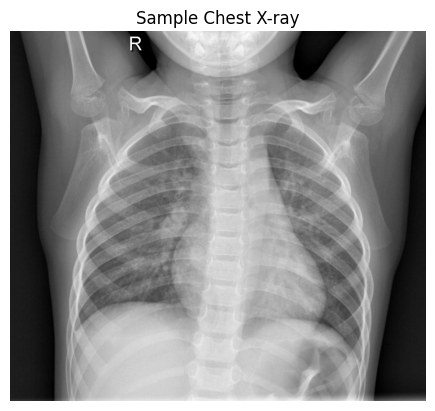

In [4]:
# Define paths to train and test directories
train_dir = os.path.join(dataset_path, "chest_xray/train")
test_dir = os.path.join(dataset_path, "chest_xray/test")

# Load a sample image
sample_image_path = os.path.join(train_dir, "NORMAL", "IM-0115-0001.jpeg")
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(sample_image)
plt.title("Sample Chest X-ray")
plt.axis("off")
plt.show()


# Preprocess the Dataset

In [5]:
def preprocess_images(directory, img_size=(150, 150)):
    images = []
    labels = []
    for label_dir in ['NORMAL', 'PNEUMONIA']:
        label_path = os.path.join(directory, label_dir)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), img_size) / 255.0
            images.append(img)
            labels.append(0 if label_dir == 'NORMAL' else 1)
    return np.array(images), np.array(labels)

# Preprocess train and test data
train_images, train_labels = preprocess_images(train_dir)
test_images, test_labels = preprocess_images(test_dir)


# Creating the CNN Models

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid')  # Binary classification: Normal (0) or Pneumonia (1)
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [7]:
history = model.fit(
    train_images, train_labels,
    validation_split=0.2,  # Use 20% of training data as validation
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10


I0000 00:00:1732328043.304899      79 service.cc:145] XLA service 0x7bda6c004760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732328043.304994      79 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 13/131 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5570 - loss: 0.8392

I0000 00:00:1732328047.571286      79 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7463 - loss: 0.5462 - val_accuracy: 0.9492 - val_loss: 0.1383
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9390 - loss: 0.1690 - val_accuracy: 0.9320 - val_loss: 0.1965
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9562 - loss: 0.1142 - val_accuracy: 0.9646 - val_loss: 0.0935
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9615 - loss: 0.1095 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9705 - loss: 0.0900 - val_accuracy: 0.9713 - val_loss: 0.0873
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9744 - loss: 0.0724 - val_accuracy: 0.9770 - val_loss: 0.0710
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9780 - val_loss: 0.0667
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0490 - val_accuracy: 0.97

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5943 - loss: 2.3470
Test Accuracy: 77.40%


# Visualize the trained model

## Plot Accuracy

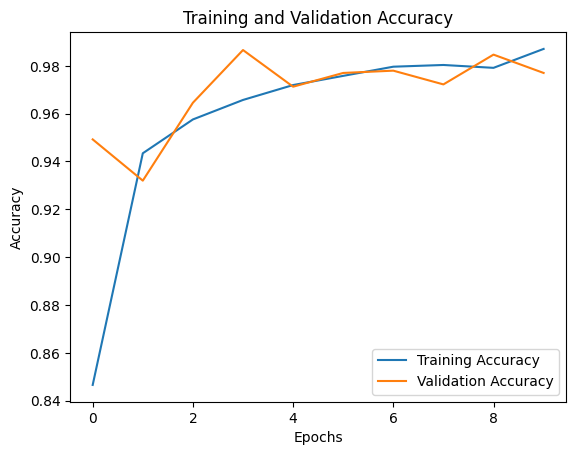

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Plot Loss

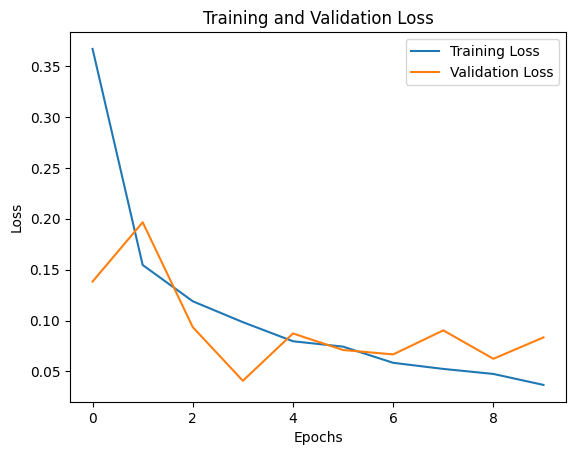

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Make the Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted Label: PNEUMONIA


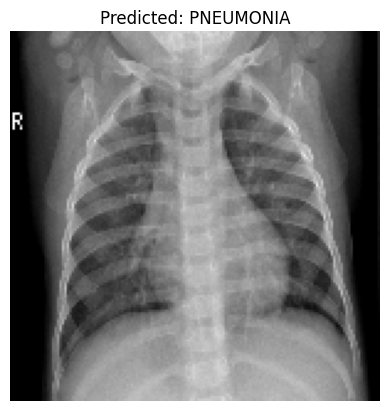

In [11]:
# Test on a single image
sample_img = test_images[0].reshape(1, 150, 150, 3)
prediction = model.predict(sample_img)

# Output the prediction
predicted_label = "NORMAL" if prediction < 0.5 else "PNEUMONIA"
print(f"Predicted Label: {predicted_label}")

# Display the image
plt.imshow(test_images[62])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


# Saving the model

In [12]:
model.save("chest_xray_model.h5")
print("Model saved as chest_xray_model.h5")


Model saved as chest_xray_model.h5
